# R Data Science Project – Uber Data Analysis
> In this project we will be talking about  Uber data analysis. <br>
> Data storytelling is an important component of Machine Learning through which companies are able to understand the background of various operations. <br>
> With the help of visualization, companies can avail the benefit of understanding the complex data and gain insights that would help them to craft decisions. 


## First we will import the Library required

- ggplot2:
This is the backbone of this project. ggplot2 is the most popular data visualization library that is most widely used for creating aesthetic visualization plots.

- ggthemes:
This is more of an add-on to our main ggplot2 library. With this, we can create better create extra themes and scales with the mainstream ggplot2 package.

- lubridate:
Our dataset involves various time-frames. In order to understand our data in separate time categories, we will make use of the lubridate package.

- dplyr:
This package is the lingua franca of data manipulation in R.

- tidyr:
This package will help you to tidy your data. The basic principle of tidyr is to tidy the columns where each variable is present in a column, each observation is represented by a row and each value depicts a cell.

- DT:
With the help of this package, we will be able to interface with the JavaScript Library called – Datatables.

- scales:
With the help of graphical scales, we can automatically map the data to the correct scales with well-placed axes and legends.

In [1]:
knitr::opts_chunk$set(echo=TRUE)
library(ggplot2)

In [2]:
library(ggthemes)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(tidyr)
library(DT)
library(scales)


- Now in this step we will create a vector of our colors that will be included in our plotting functions.

In [5]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

####  loading the dataset

- We will read several csv files that contain the data from April 2014 to September 2014.
- We will store these in corresponding data frames like apr_data, may_data, etc. 
- After we have read the files, we will combine all of this data into a single dataframe called ‘data_2014’.

In [6]:
apr_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
may_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
jun_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
jul_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
aug_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
sep_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

### Then, in the next step, we will perform the appropriate formatting of Date.Time column. 
- Then, we will proceed to create factors of time objects like day, month, year etc.

In [7]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [8]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

## Plotting the trips by the hours in a day
- We will use the ggplot function to plot the number of trips that the passengers had made in a day. - We will also use dplyr to aggregate our data. 
- In the resulting visualizations, we can understand how the number of passengers fares throughout the day.
- We observe that the number of trips are higher in the evening around 5:00 and 6:00 PM.

In [9]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

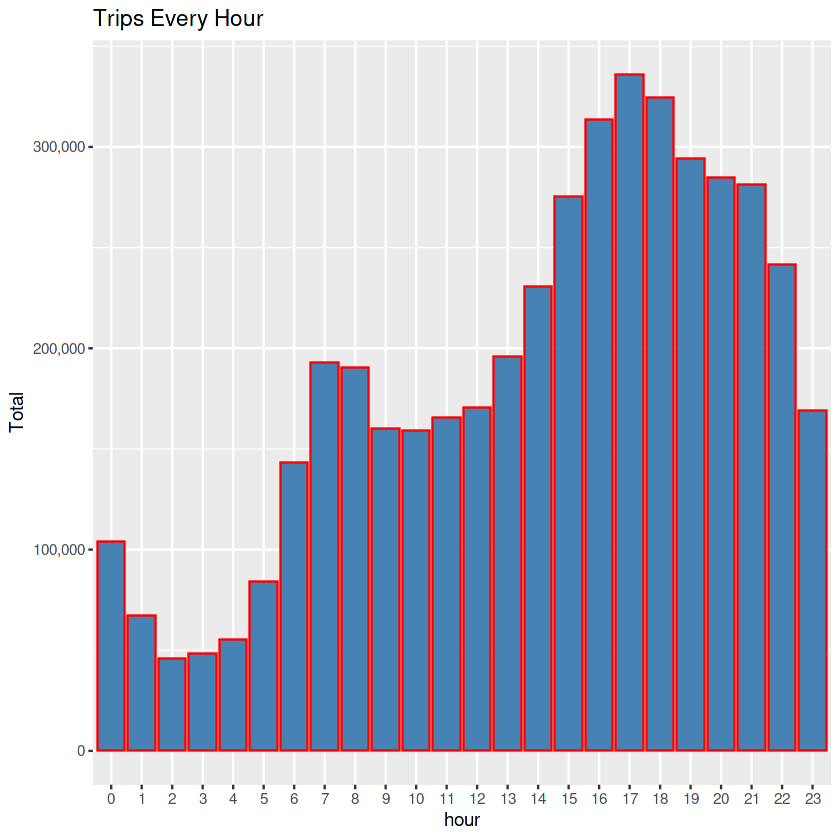

In [10]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

In [11]:
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



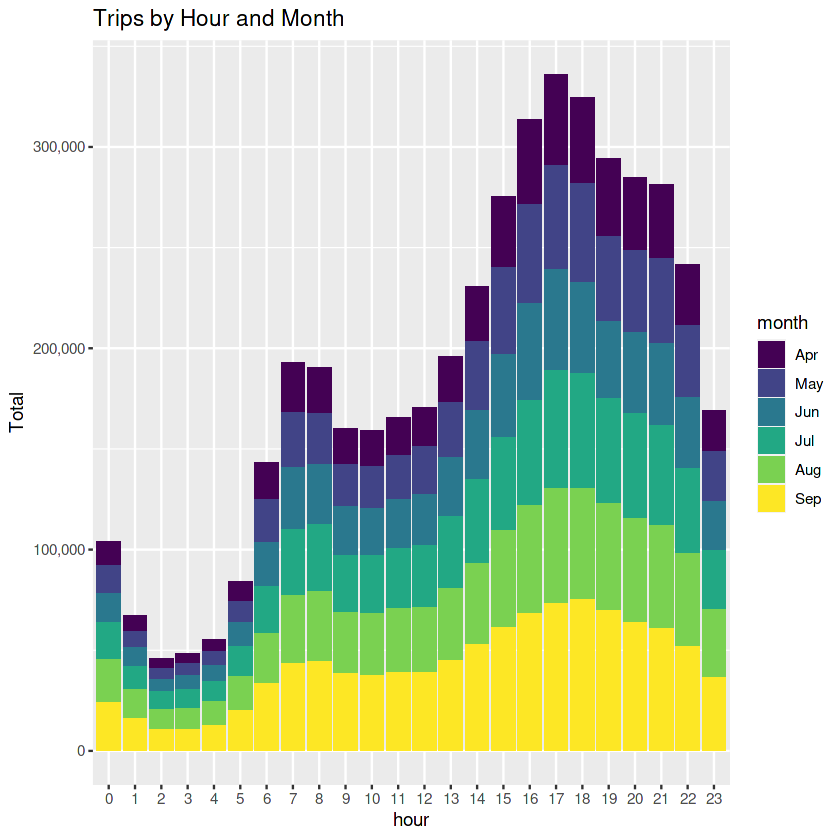

In [12]:
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

## Plotting data by trips during every day of the month
- plotting our data based on every day of the month. 
- We observe from the resulting visualization that 30th of the month had the highest trips in the year which is mostly contributed by the month of April.

In [13]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

HTML widgets cannot be represented in plain text (need html)

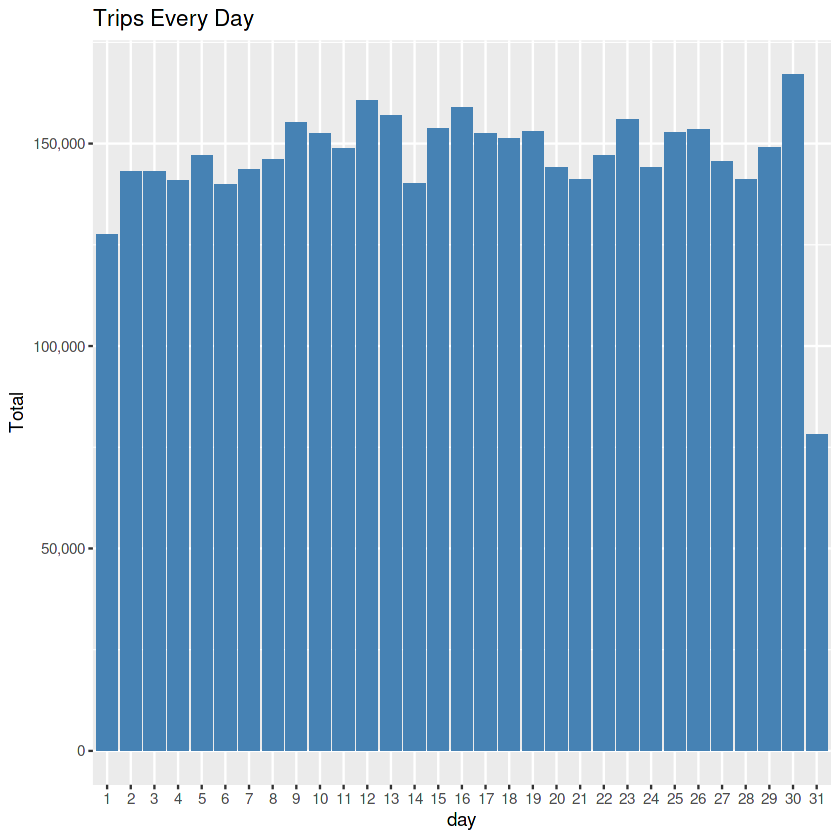

In [14]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

In [15]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



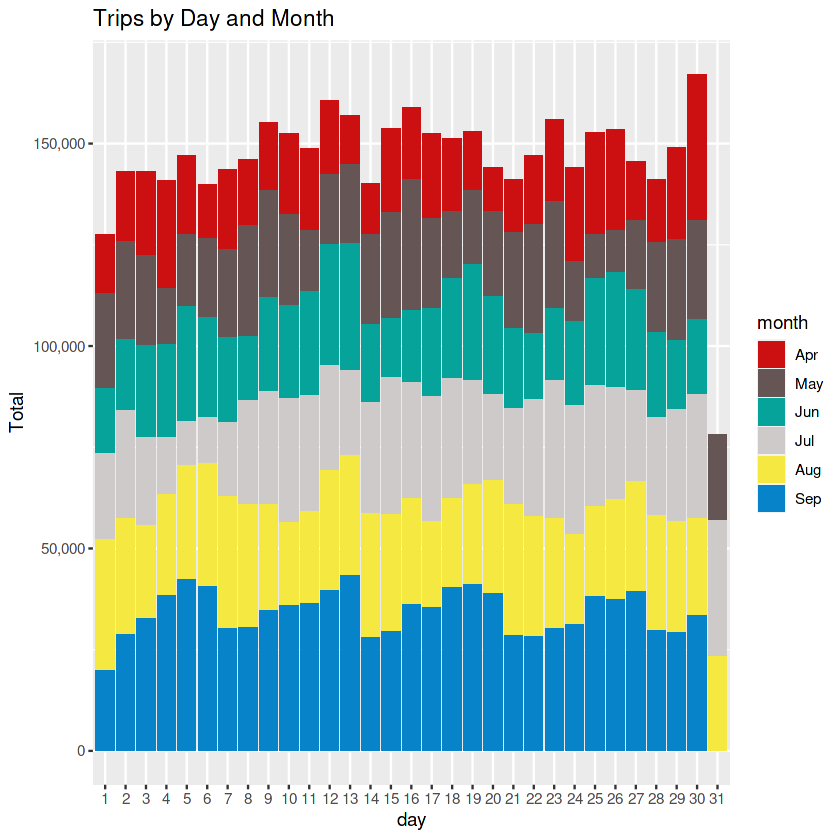

In [16]:
ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

In [17]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



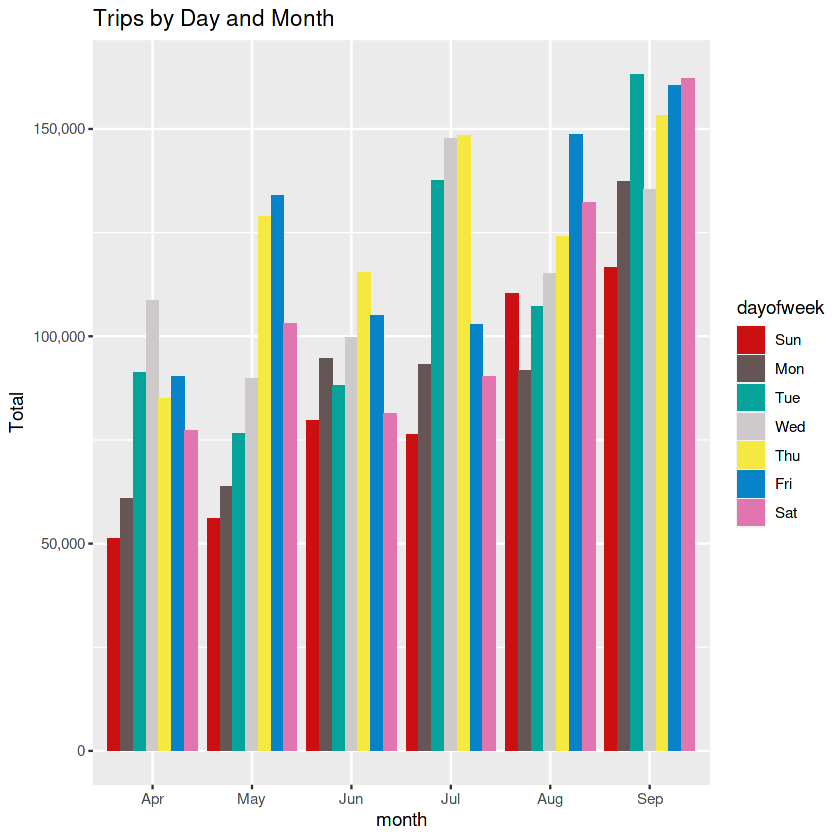

In [18]:
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

## Number of Trips taking place during months in a year
- In this section, we will visualize the number of trips that are taking place each month of the year. 
- In the output visualization, we observe that most trips were made during the month of September. 
- Furthermore, we also obtain visual reports of the number of trips that were made on every day of the week.

In [19]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)

HTML widgets cannot be represented in plain text (need html)

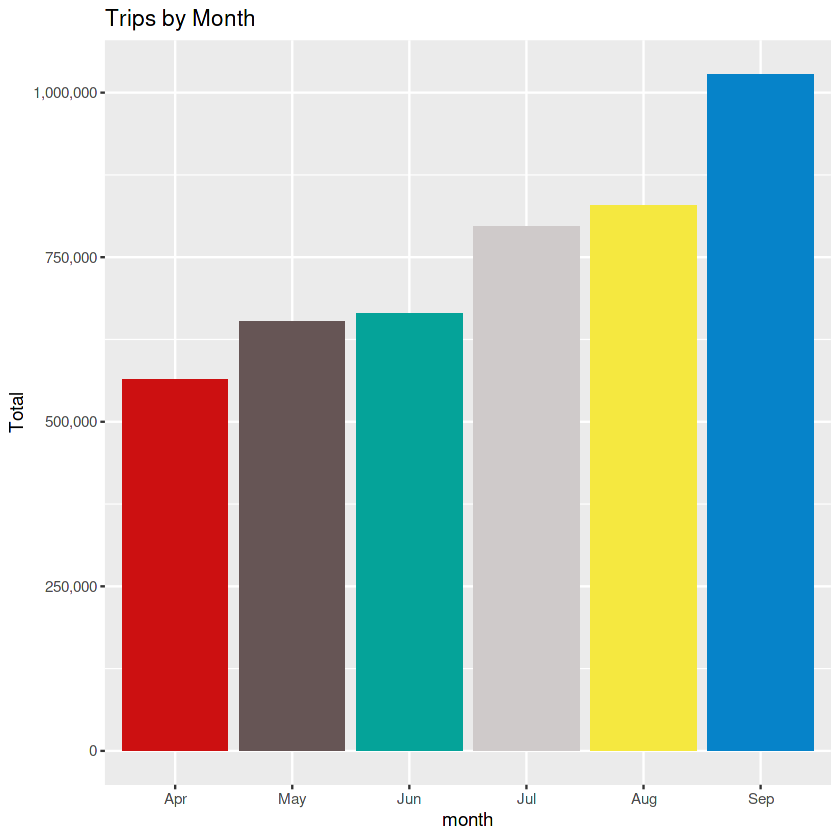

In [20]:
ggplot(month_group , aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



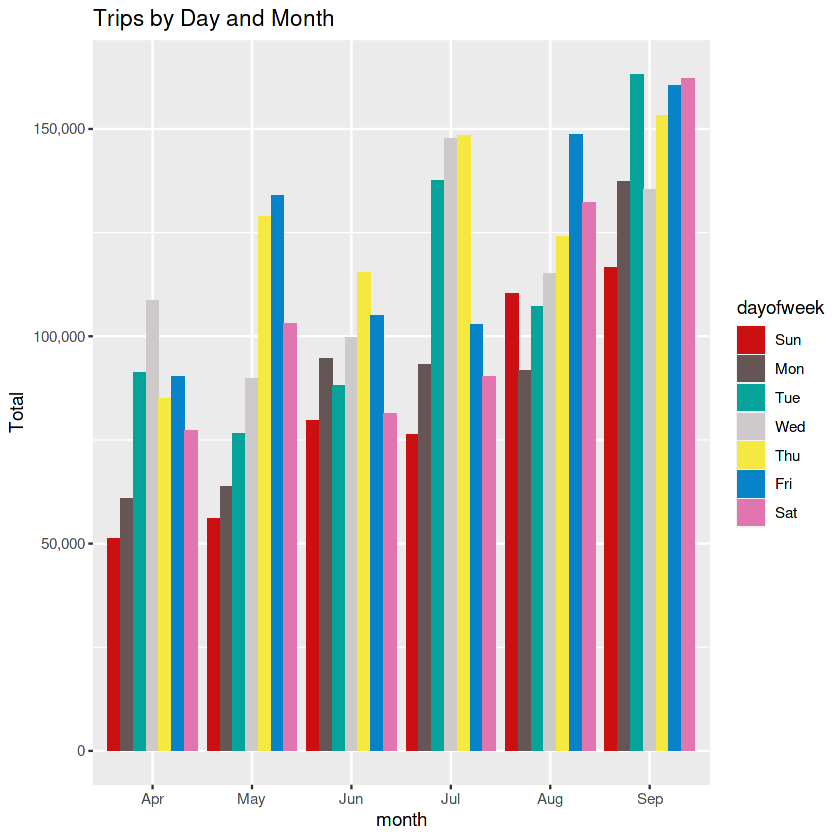

In [21]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

## Finding out the number of Trips by bases
- In the following visualization, we plot the number of trips that have been taken by the passengers from each of the bases. 
- There are five bases in all out of which, we observe that B02617 had the highest number of trips. Furthermore, this base had the highest number of trips in the month B02617. 
- Thursday observed highest trips in the three bases – B02598, B02617, B02682.

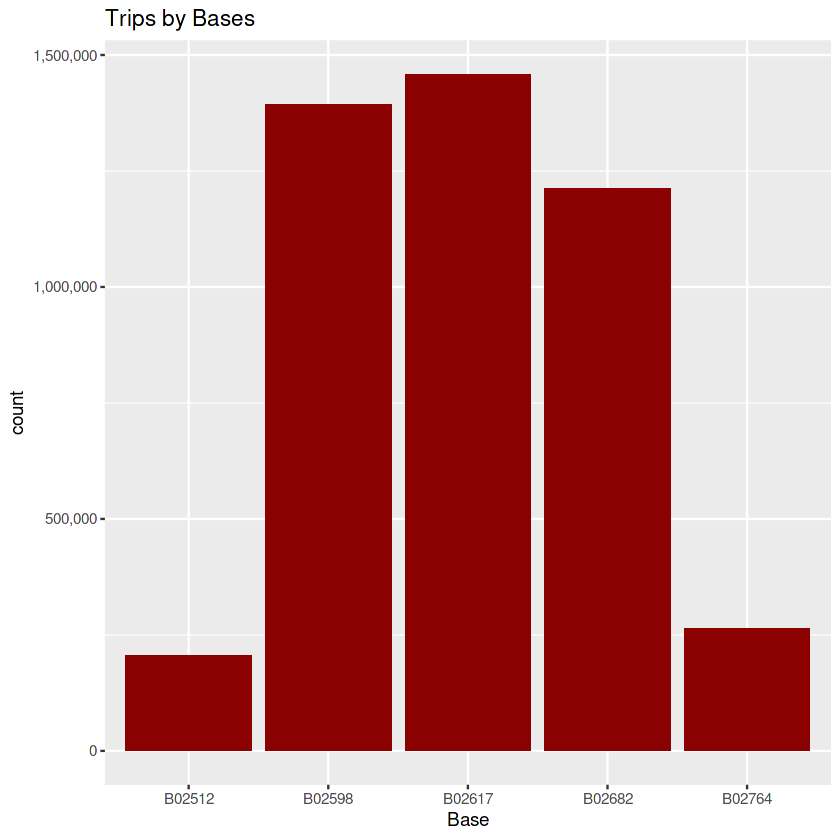

In [22]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

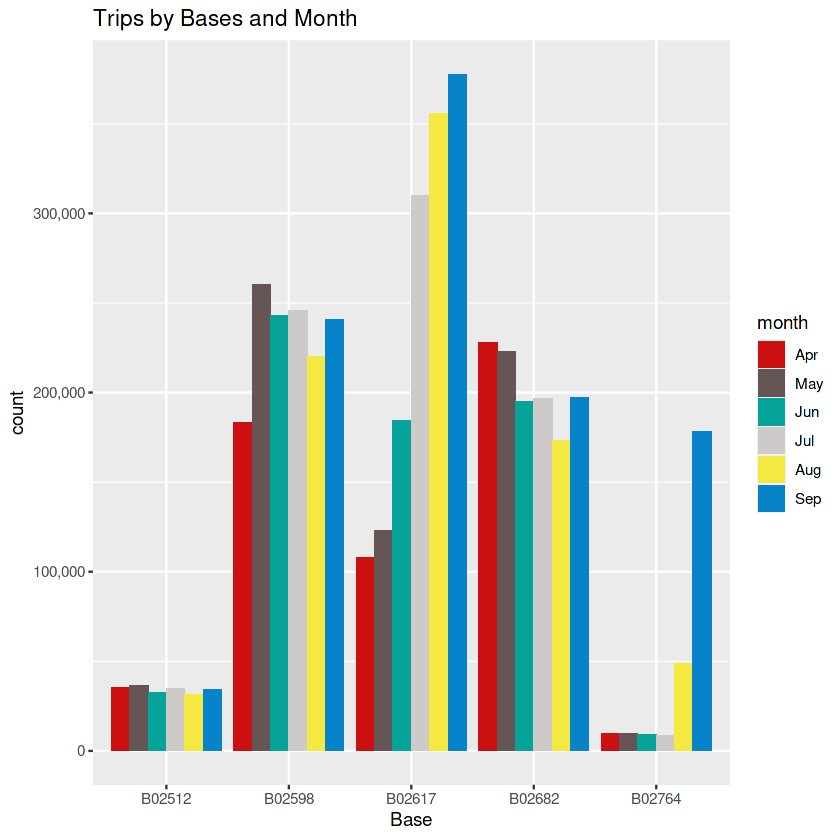

In [23]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors)

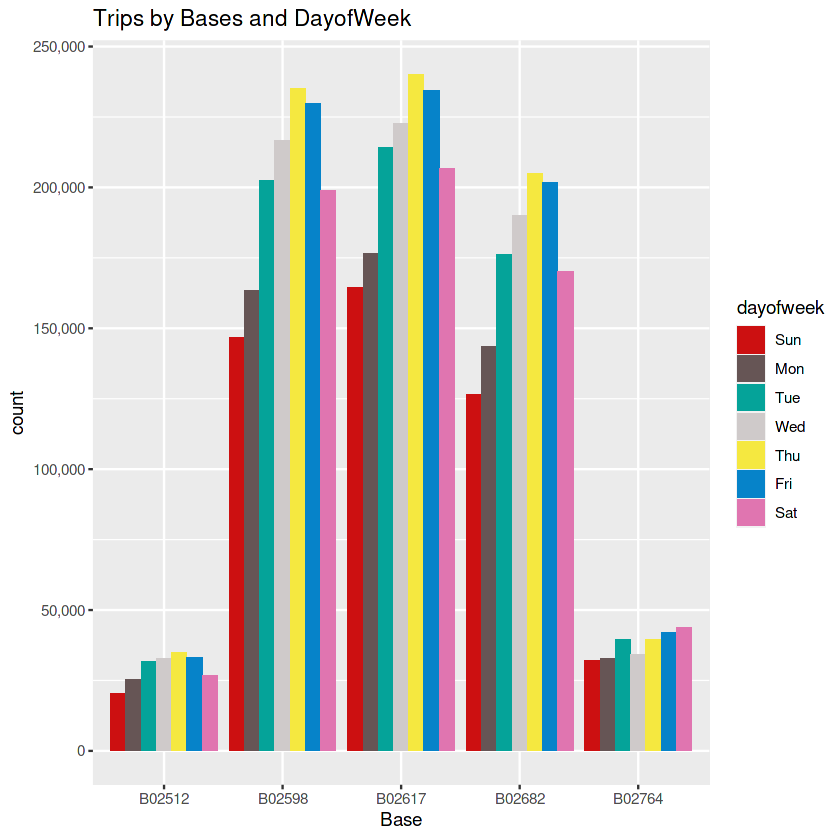

In [24]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

## Creating a Heatmap visualization of day, hour and month
### In this section, we will learn how to plot heatmaps using ggplot(). We will plot five heatmap plots –

- First, we will plot Heatmap by Hour and Day.
- Second, we will plot Heatmap by Month and Day.
- Third, a Heatmap by Month and Day of the Week.
- Fourth, a Heatmap that delineates Month and Bases.
- Finally, we will plot the heatmap, by bases and day of the week.

In [25]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())

datatable(day_and_hour)

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.



HTML widgets cannot be represented in plain text (need html)

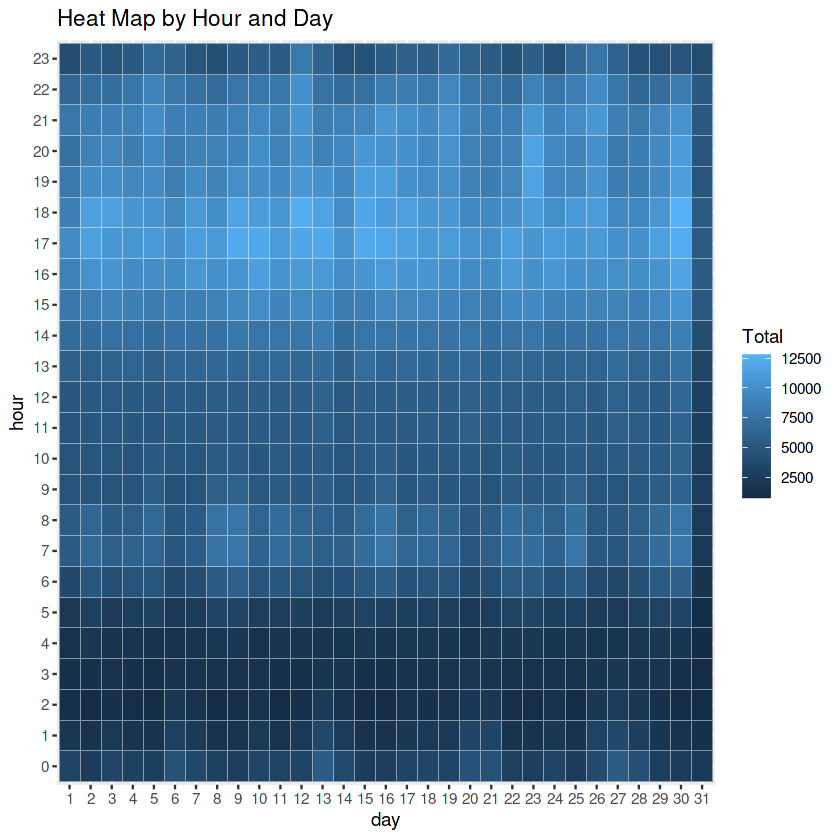

In [26]:
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

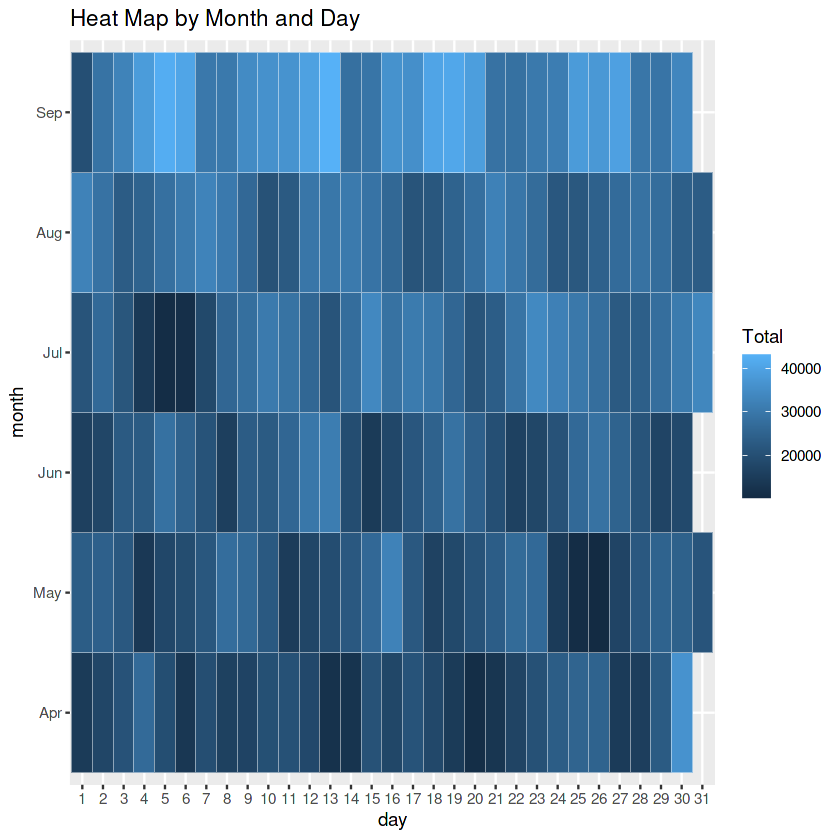

In [27]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

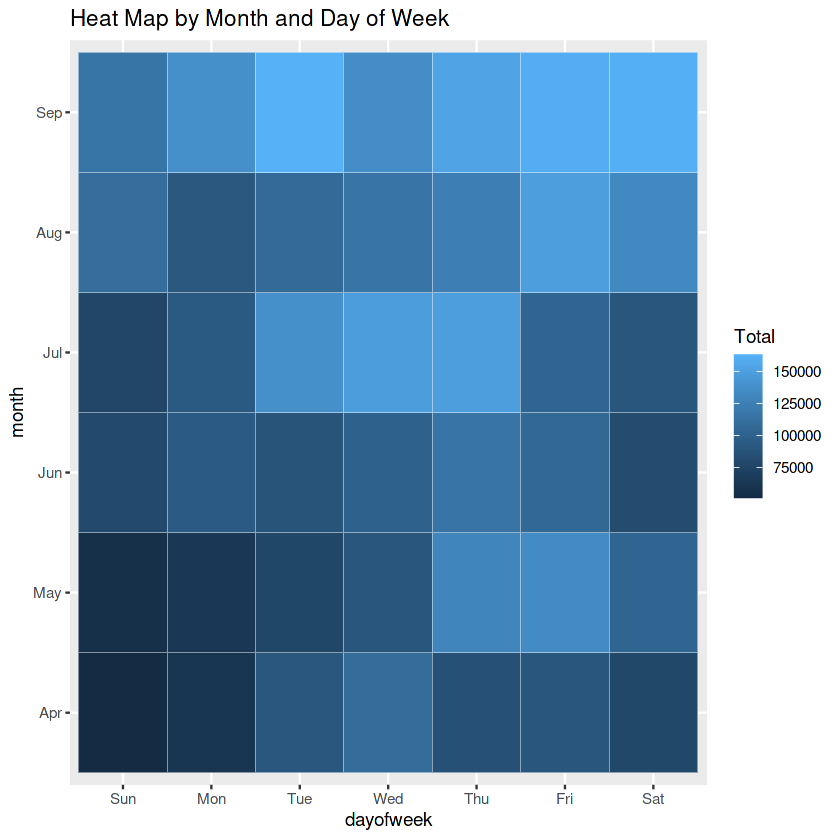

In [28]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.



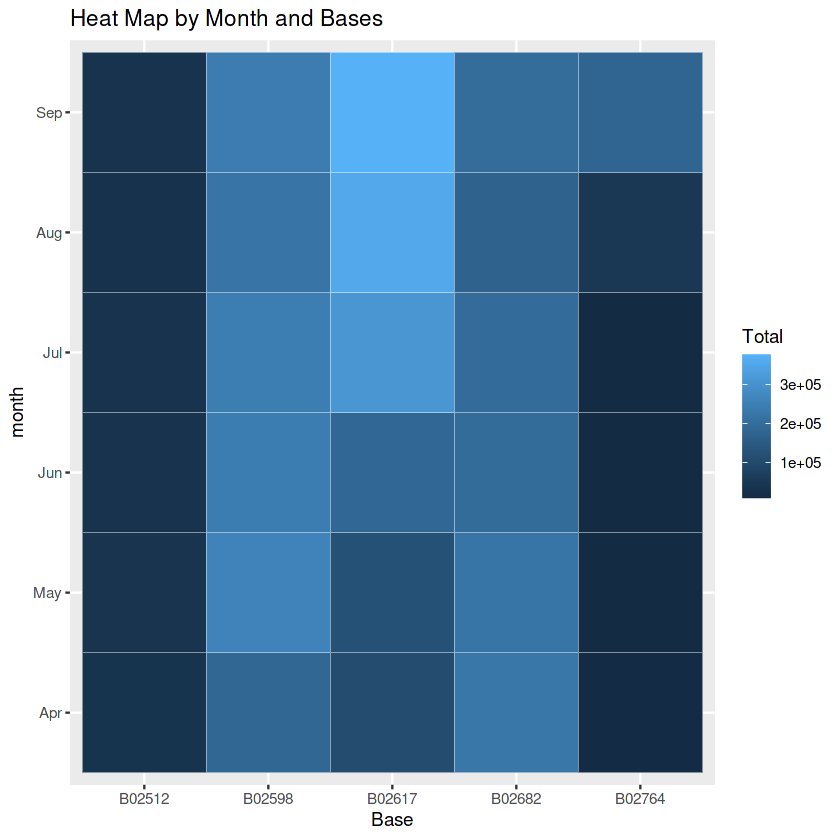

In [29]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 

day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 

ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

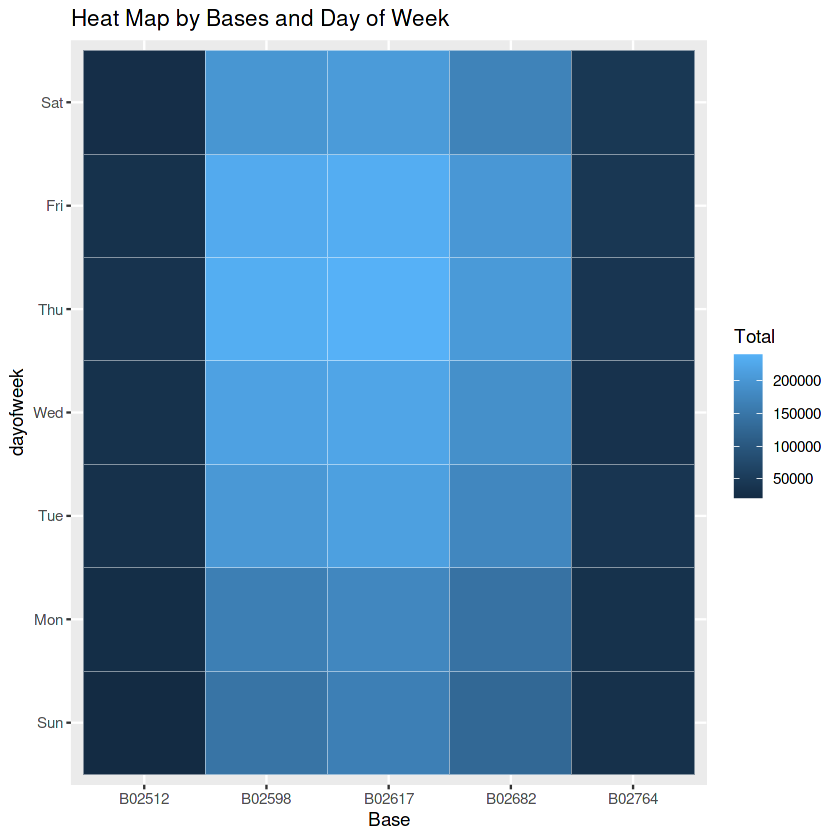

In [30]:
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

## Creating a map visualization of rides in New York
- In the final section, we will visualize the rides in New York city by creating a geo-plot that will help us to visualize the rides during 2014 (Apr – Sep) and by the bases in the same period.

In [31]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


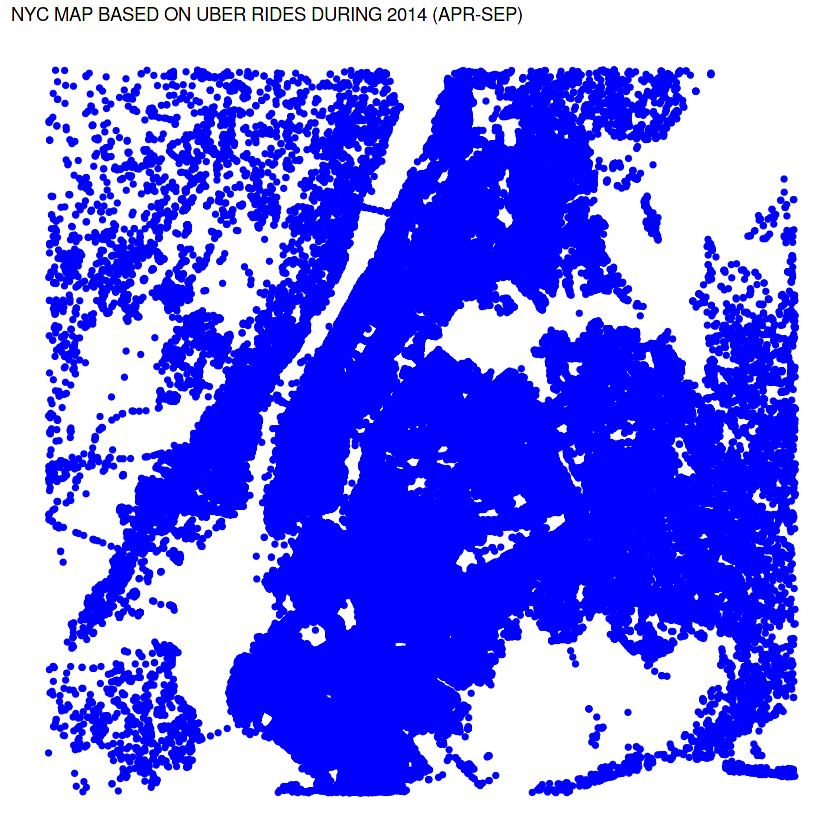

In [32]:
ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

Warning message:
“Removed 71701 rows containing missing values (geom_point).”


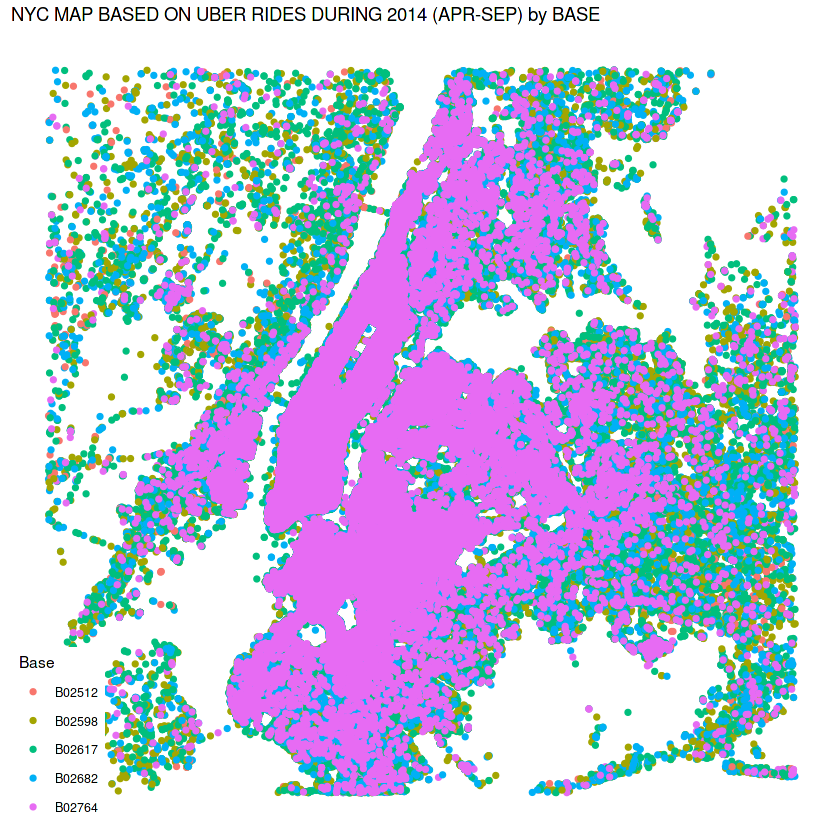

In [33]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")